In [2]:
import VISSSlib
import yaml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
settings = "/projekt1//ag_maahn/VISSS_config/hyytiala_v1.yaml"
case = "20211221-000000"
case = "20220117-070000"
case = "20220225-090000"
case = "20220404-000000"
settings = "/projekt1//ag_maahn/VISSS_config/sail_v1.yaml"; case = "20221106-2000"
settings = "/projekt1//ag_maahn/VISSS_config/sail_v1.yaml"; case = "20221114-151000" #backlight adjusted
settings = "/projekt1//ag_maahn/VISSS_config/sail_v1.yaml"; case = "20230120-180000" #snow removal
settings = "/projekt1//ag_maahn/VISSS_config/nyaalesund_v4.yaml"; case = "20221231-073000"
settings = "/projekt1//ag_maahn/VISSS_config/hyytiala_v1.yaml"; case = "20210924-2100" #rain?
settings = "/projekt1//ag_maahn/VISSS_config/hyytiala_v1.yaml"; case = "20210909-1100" #rain?
#settings = "/projekt1//ag_maahn/VISSS_config/sail_v1.yaml"; case = "20230213-200000" #backlight adjusted
settings = "/projekt1//ag_maahn/VISSS_config/nyaalesund_v3.yaml"; case = "20220504-183000"
settings = "/projekt1//ag_maahn/VISSS_config/nyaalesund_v4.yaml"; case = "20230120-210000"
settings = "/projekt1//ag_maahn/VISSS_config/sail_v1.yaml"; case = "20230414-064000"
settings = "/projekt1//ag_maahn/VISSS_config/mosaic_v1.yaml"; case = "20200505-105000" #looks stable after 073500
settings = "/projekt1//ag_maahn/VISSS_config/mosaic_v1.yaml"; case = "20200521-161000"
settings = "/projekt1//ag_maahn/VISSS_config/lim_particleCalibration_20231027.yaml"; case = "20231027-095000"
settings = "/projekt1//ag_maahn/VISSS_config/lim_sphereCalibration_20231103.yaml"; case = "20231103-105215"

version='2023.1.6'

In [7]:

from importlib import reload
reload(VISSSlib.matching)
reload(VISSSlib.fixes)
reload(VISSSlib.tools)
reload(VISSSlib.metadata)

<module 'VISSSlib.metadata' from '/home/mmaahn/projectsSrv/VISSSlib/src/VISSSlib/metadata.py'>

In [22]:
config = VISSSlib.tools.readSettings(settings)
fl = VISSSlib.files.FindFiles(case, config.leader, config)
fname1L = fl.listFiles("level1detect")[0]
fname1Match = VISSSlib.files.FilenamesFromLevel(fname1L, config).fname["level1match"]

In [9]:
rotate_default = pd.Series({
    "camera_phi": 0.0, #zero is unstable!
    "camera_theta": 0.0, #zero is unstable!
#     "psi": 0.0, #zero is unstable!
#     "Of_y": 0.0, #zero is unstable!
    "camera_Ofz": 0.0, #zero is unstable!
#     "Ol_x": 0.0, #zero is unstable!
})
# 
rotate_err_default = pd.Series({
    "camera_phi":  5,
    "camera_theta":  5,
#     "psi": .1,
#     "Of_y": 50, 
    "camera_Ofz": 50, 
#     "Ol_x":50, #zero is unstable!
})

In [10]:
#rotate_default = pd.Series(config.rotate['20221105-0000']["transformation"])
#rotate_err_default = pd.Series(config.rotate['20221105-0000']["transformation_err"])

## in the first step, use only large particles and do not use Z difference at all!

set minDMax4rot so that matched twice does appear not that often

do not choose a case where more than one particle is seen at the sma etime - filter this data ??

In [11]:
reload(VISSSlib.matching)
reload(VISSSlib.tools)
reload(VISSSlib.fixes)

fout, matchedDat, rot, rot_err = VISSSlib.matching.matchParticles(fname1L, config, doRot=True, rotationOnly=True, 
                rotate=rotate_default, rotate_err=rotate_err_default, maxDiffMs="config", nPoints=5000, testing=False, chunckSize=10000, minSamples4rot=40,
                  minDMax4rot=10,
                  singleParticleFramesOnly=True,
                                              nSamples4rot=10000,
                  sigma = {
#             "Z" : 1.7, # estimated from OE results
            "H" : 1.2, # estimated from OE results
            "I" : .01,
        })
rot, rot_err

2023-11-03 13:05:01,092: INFO: VISSSlib.matching.matchParticles: opening /projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_leader_H2212557_20231103-105215.nc
2023-11-03 13:05:01,381: INFO: VISSSlib.matching.matchParticles: 638
2023-11-03 13:05:01,430: INFO: VISSSlib.matching.matchParticles: opening ['/projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_follower_H2212528_20231103-105215.nc']
2023-11-03 13:05:01,520: INFO: VISSSlib.matching.matchParticles: 1 of 2 slice for follower restart 2023-11-03T10:52:12.170788000 2023-11-03T10:52:57.142340000
2023-11-03 13:05:01,521: WARNING: VISSSlib.matching.matchParticles: CONTINUE, too little follower data 1
2023-11-03 13:05:01,522: INFO: VISSSlib.matching.matchParticles: 2 of 2 slice for follower restart 2023-11-03T10:52:57.142340000 2023-11-03T10:56:49.247454000
usin

(camera_phi       1.071445
 camera_theta     0.347347
 camera_Ofz     -39.857916
 dtype: float64,
 camera_phi      0.015561
 camera_theta    0.023958
 camera_Ofz      0.310734
 dtype: float64)

In [12]:

fout, matchedDat, rot2, rot_err2 = VISSSlib.matching.matchParticles(fname1L, config, doRot=True, rotationOnly=True, rotate=rot, rotate_err=rot_err, nPoints=500, minSamples4rot=5)


2023-11-03 13:05:23,167: INFO: VISSSlib.matching.matchParticles: opening /projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_leader_H2212557_20231103-105215.nc
2023-11-03 13:05:23,225: INFO: VISSSlib.matching.matchParticles: 638
2023-11-03 13:05:23,265: INFO: VISSSlib.matching.matchParticles: opening ['/projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_follower_H2212528_20231103-105215.nc']
2023-11-03 13:05:23,325: INFO: VISSSlib.matching.matchParticles: 1 of 2 slice for follower restart 2023-11-03T10:52:12.170788000 2023-11-03T10:52:57.142340000
2023-11-03 13:05:23,327: WARNING: VISSSlib.matching.matchParticles: CONTINUE, too little follower data 1
2023-11-03 13:05:23,327: INFO: VISSSlib.matching.matchParticles: 2 of 2 slice for follower restart 2023-11-03T10:52:57.142340000 2023-11-03T10:56:49.247454000
usin

In [13]:
fout, matchedDat, rot3, rot_err3 = VISSSlib.matching.matchParticles(fname1L, config, doRot=True, rotationOnly=True, rotate=rot2, rotate_err=rot_err2, nPoints=500, minSamples4rot=5)


2023-11-03 13:05:33,321: INFO: VISSSlib.matching.matchParticles: opening /projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_leader_H2212557_20231103-105215.nc
2023-11-03 13:05:33,395: INFO: VISSSlib.matching.matchParticles: 638
2023-11-03 13:05:33,437: INFO: VISSSlib.matching.matchParticles: opening ['/projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_follower_H2212528_20231103-105215.nc']
2023-11-03 13:05:33,503: INFO: VISSSlib.matching.matchParticles: 1 of 2 slice for follower restart 2023-11-03T10:52:12.170788000 2023-11-03T10:52:57.142340000
2023-11-03 13:05:33,505: WARNING: VISSSlib.matching.matchParticles: CONTINUE, too little follower data 1
2023-11-03 13:05:33,505: INFO: VISSSlib.matching.matchParticles: 2 of 2 slice for follower restart 2023-11-03T10:52:57.142340000 2023-11-03T10:56:49.247454000
usin

In [14]:
print(yaml.dump({"rotate":rot3.round(6).to_dict(), "rotate_err": rot_err3.round(6).to_dict()}))

rotate:
  camera_Ofz: -47.198566
  camera_phi: 0.227195
  camera_theta: -0.704464
rotate_err:
  camera_Ofz: 0.408626
  camera_phi: 0.018588
  camera_theta: 0.030948



In [15]:
print(yaml.dump({"rotate":rot3.round(6).to_dict(), "rotate_err": rot_err3.round(6).to_dict()}))

rotate:
  camera_Ofz: -47.198566
  camera_phi: 0.227195
  camera_theta: -0.704464
rotate_err:
  camera_Ofz: 0.408626
  camera_phi: 0.018588
  camera_theta: 0.030948



In [16]:
fout, matchedDat, rot4, rot_err4 = VISSSlib.matching.matchParticles(fname1L, config, doRot=True, rotationOnly=True, rotate=rot3, rotate_err=rot_err3, nPoints=500, minSamples4rot=5)


2023-11-03 13:05:38,127: INFO: VISSSlib.matching.matchParticles: opening /projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_leader_H2212557_20231103-105215.nc
2023-11-03 13:05:38,195: INFO: VISSSlib.matching.matchParticles: 638
2023-11-03 13:05:38,240: INFO: VISSSlib.matching.matchParticles: opening ['/projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_follower_H2212528_20231103-105215.nc']
2023-11-03 13:05:38,304: INFO: VISSSlib.matching.matchParticles: 1 of 2 slice for follower restart 2023-11-03T10:52:12.170788000 2023-11-03T10:52:57.142340000
2023-11-03 13:05:38,305: WARNING: VISSSlib.matching.matchParticles: CONTINUE, too little follower data 1
2023-11-03 13:05:38,306: INFO: VISSSlib.matching.matchParticles: 2 of 2 slice for follower restart 2023-11-03T10:52:57.142340000 2023-11-03T10:56:49.247454000
usin

In [17]:
print(yaml.dump({"rotate":rot4.round(6).to_dict(), "rotate_err": rot_err4.round(6).to_dict()}))

rotate:
  camera_Ofz: -47.490463
  camera_phi: 0.221819
  camera_theta: -0.724924
rotate_err:
  camera_Ofz: 0.405063
  camera_phi: 0.018476
  camera_theta: 0.03062



In [18]:
print(yaml.dump({"rotate": {case: {"transformation": rot4.round(
    6).to_dict(), "transformation_err": rot_err4.round(6).to_dict()}}#
                }))

rotate:
  20231103-105215:
    transformation:
      camera_Ofz: -47.490463
      camera_phi: 0.221819
      camera_theta: -0.724924
    transformation_err:
      camera_Ofz: 0.405063
      camera_phi: 0.018476
      camera_theta: 0.03062




    rotate:
      20231027-095000:
        transformation:
          camera_Ofz: -15.198692
          camera_phi: 3.4115
          camera_theta: 2.670668
        transformation_err:
          camera_Ofz: 15.471353
          camera_phi: 0.610895
          camera_theta: 0.738198
    rotate:
      20231027-100000:
        transformation:
          camera_Ofz: 27.174651
          camera_phi: -1.940341
          camera_theta: -0.726047
        transformation_err:
          camera_Ofz: 0.702143
          camera_phi: 0.049464
          camera_theta: 0.056899


# check camera positions

In [23]:
fname1L

'/projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_leader_H2212557_20231103-105215.nc'

In [24]:
fout, matchedDat, rot5, rot_err5 = VISSSlib.matching.matchParticles(fname1L, config, rotate=rot4, rotate_err=rot_err4, minSamples4rot=5)


2023-11-03 13:41:51,966: INFO: VISSSlib.matching.matchParticles: opening /projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_leader_H2212557_20231103-105215.nc
2023-11-03 13:41:52,045: INFO: VISSSlib.matching.matchParticles: 638
2023-11-03 13:41:52,119: INFO: VISSSlib.matching.matchParticles: opening ['/projekt6/ag_maahn/data_obs_nobackup/lim/visss3_2023.1.6/sphereCalibration/level1detect/2023/11/03/level1detect_V2023.1.6_lim_VISSS3t_visss3_follower_H2212528_20231103-105215.nc']
2023-11-03 13:41:52,184: INFO: VISSSlib.matching.matchParticles: 1 of 2 slice for follower restart 2023-11-03T10:52:12.170788000 2023-11-03T10:52:57.142340000
2023-11-03 13:41:52,186: WARNING: VISSSlib.matching.matchParticles: CONTINUE, too little follower data 1
2023-11-03 13:41:52,187: INFO: VISSSlib.matching.matchParticles: 2 of 2 slice for follower restart 2023-11-03T10:52:57.142340000 2023-11-03T10:56:49.247454000
usin

(array([  0.,   0.,   0.,   1.,   0.,   0.,   0.,   7.,  73., 158., 142.,
         81.,  18.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <BarContainer object of 20 artists>)

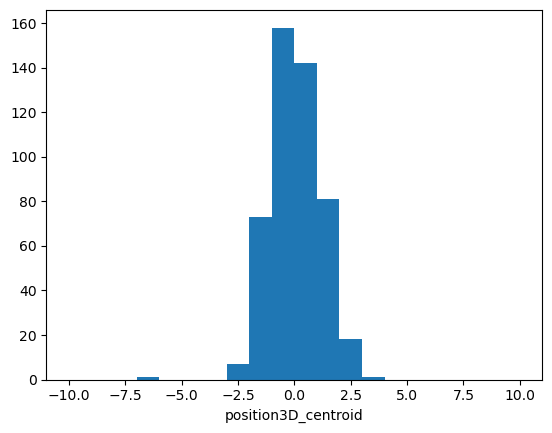

In [29]:
(matchedDat.position3D_centroid.sel(dim3D="z") - matchedDat.position3D_centroid.sel(dim3D="z_rotated")).plot.hist(bins=np.arange(-10,11,1))

In [42]:
ii = (matchedDat.Dmax.mean("camera")< 35) & (matchedDat.blur.mean("camera")> 1)
matchedDat1 = matchedDat.isel(pair_id=ii)

In [43]:
bins = np.linspace(0, config.frame_width, 21)

In [44]:
matchedDat1

<xarray.Dataset>
Dimensions:              (camera: 2, pair_id: 215, fitMethod: 3, dim2D: 2,
                          camera_rotation: 2, percentiles: 9, dim3D: 4)
Coordinates:
    pid                  (camera, pair_id) int64 335 417 418 419 ... 516 517 518
  * percentiles          (percentiles) int64 10 20 30 40 50 60 70 80 90
  * fitMethod            (fitMethod) <U30 'cv2.fitEllipseDirect' ... 'cv2.min...
  * dim2D                (dim2D) <U2 'x' 'y'
  * pair_id              (pair_id) int64 200 267 268 269 270 ... 477 478 479 480
  * camera               (camera) <U30 'leader_H2212557' 'follower_H2212528'
  * dim3D                (dim3D) <U9 'x' 'y' 'z' 'z_rotated'
  * camera_rotation      (camera_rotation) <U30 'mean' 'err'
Data variables: (12/32)
    Dfit                 (camera, pair_id, fitMethod, dim2D) float32 1.316 .....
    Dmax                 (camera, pair_id) float32 9.434 33.03 ... 22.2 22.22
    Droi                 (camera, pair_id, dim2D) int16 9 6 33 32 ... 21 22 22
    angle                (camera, pair_id, fitMethod) float32 57.34 ... 90.0
    area                 (camera, pair_id) float32 2.0 795.0 ... 348.0 356.5
    aspectRatio          (camera, pair_id, fitMethod) float32 0.1535 ... 1.0
    ...                   ...
    position_centroid    (camera, pair_id, dim2D) int16 1581 71 387 ... 243 897
    position_circle      (camera, pair_id, dim2D) float32 1.583e+03 ... 897.2
    position_fit         (camera, pair_id, fitMethod, dim2D) float32 1.583e+0...
    position_upperLeft   (camera, pair_id, dim2D) int16 1579 68 371 ... 233 887
    record_id            (camera, pair_id) int64 432 546 547 548 ... 775 776 777
    record_time          (camera, pair_id) datetime64[ns] 2023-11-03T10:55:00...
Attributes:
    title:       Video In Situ Snowfall Sensor (VISSS) observations at lim
    source:      visss3 observations at lim
    history:     2023-11-03 12:41:53.178055: created with VISSSlib 2023.1.6.p...
    references:  Maahn, M., Moisseev, D., Steinke, I., Maherndl, N., and Shup...

(0.0, 1280.0)

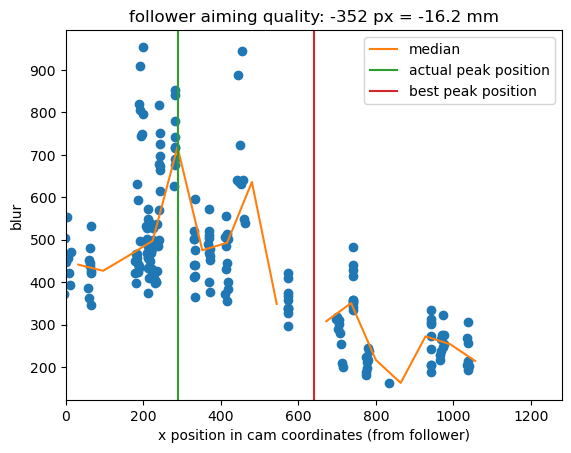

In [51]:
x =(matchedDat1.position3D_center.sel(dim3D="y"))

plt.scatter(x, matchedDat1.blur.sel(camera=config.leader))

med = matchedDat1.blur.sel(camera=config.leader).groupby_bins(x, bins=bins).median()

med.plot(color="C1", label="median")

peakPos = med.position3D_center_bins[[med.argmax()]].values[0].mid
plt.axvline(peakPos, color="C2", label="actual peak position")
plt.axvline(config.frame_width//2, color="C3", label="best peak position")

plt.legend()
plt.xlabel("x position in cam coordinates (from follower)")
distance = peakPos-config.frame_width//2
distanceMM = distance*config.resolution/1000
plt.title("follower aiming quality: %i px = %.1f mm"%(distance, distanceMM))

plt.xlim(0,config.frame_width)

(0.0, 1280.0)

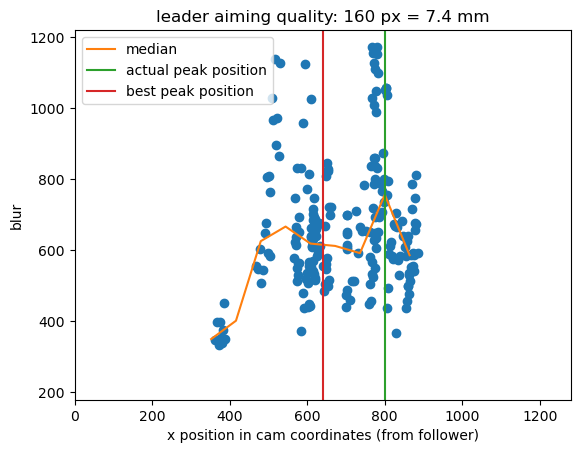

In [52]:
x =(matchedDat1.position3D_center.sel(dim3D="x"))

plt.scatter(x, matchedDat1.blur.sel(camera=config.follower))

med = matchedDat1.blur.sel(camera=config.follower).groupby_bins(x, bins=bins).median()

med.plot(color="C1", label="median")

peakPos = med.position3D_center_bins[[med.argmax()]].values[0].mid
plt.axvline(peakPos, color="C2", label="actual peak position")
plt.axvline(config.frame_width//2, color="C3", label="best peak position")

plt.legend()
plt.xlabel("x position in cam coordinates (from follower)")
distance = peakPos-config.frame_width//2
distanceMM = distance*config.resolution/1000
plt.title("leader aiming quality: %i px = %.1f mm"%(distance, distanceMM))

plt.xlim(0,config.frame_width)

In [48]:
matchedDat1

<xarray.Dataset>
Dimensions:              (camera: 2, pair_id: 215, fitMethod: 3, dim2D: 2,
                          camera_rotation: 2, percentiles: 9, dim3D: 4)
Coordinates:
    pid                  (camera, pair_id) int64 335 417 418 419 ... 516 517 518
  * percentiles          (percentiles) int64 10 20 30 40 50 60 70 80 90
  * fitMethod            (fitMethod) <U30 'cv2.fitEllipseDirect' ... 'cv2.min...
  * dim2D                (dim2D) <U2 'x' 'y'
  * pair_id              (pair_id) int64 200 267 268 269 270 ... 477 478 479 480
  * camera               (camera) <U30 'leader_H2212557' 'follower_H2212528'
  * dim3D                (dim3D) <U9 'x' 'y' 'z' 'z_rotated'
  * camera_rotation      (camera_rotation) <U30 'mean' 'err'
Data variables: (12/32)
    Dfit                 (camera, pair_id, fitMethod, dim2D) float32 1.316 .....
    Dmax                 (camera, pair_id) float32 9.434 33.03 ... 22.2 22.22
    Droi                 (camera, pair_id, dim2D) int16 9 6 33 32 ... 21 22 22
    angle                (camera, pair_id, fitMethod) float32 57.34 ... 90.0
    area                 (camera, pair_id) float32 2.0 795.0 ... 348.0 356.5
    aspectRatio          (camera, pair_id, fitMethod) float32 0.1535 ... 1.0
    ...                   ...
    position_centroid    (camera, pair_id, dim2D) int16 1581 71 387 ... 243 897
    position_circle      (camera, pair_id, dim2D) float32 1.583e+03 ... 897.2
    position_fit         (camera, pair_id, fitMethod, dim2D) float32 1.583e+0...
    position_upperLeft   (camera, pair_id, dim2D) int16 1579 68 371 ... 233 887
    record_id            (camera, pair_id) int64 432 546 547 548 ... 775 776 777
    record_time          (camera, pair_id) datetime64[ns] 2023-11-03T10:55:00...
Attributes:
    title:       Video In Situ Snowfall Sensor (VISSS) observations at lim
    source:      visss3 observations at lim
    history:     2023-11-03 12:41:53.178055: created with VISSSlib 2023.1.6.p...
    references:  Maahn, M., Moisseev, D., Steinke, I., Maherndl, N., and Shup...